## Data Understanding and Preparation 

In [155]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [156]:
#Reading the data into a dataframe
car = pd.read_csv("CarPrice_Assignment.csv")

In [157]:
#Checking the data 
#car.head()

In [158]:
#splitting the company name from carname column and updating the column
car['CarName'] = car['CarName'].apply(lambda x: x.split()[0])

In [159]:
#checking in random data if the modification has been applied
car.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
126,127,3,porcshce,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,32528.0
45,46,0,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,8916.5
34,35,1,honda,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7129.0
71,72,-1,buick,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
125,126,3,porsche,gas,std,two,hatchback,rwd,front,94.5,...,151,mpfi,3.94,3.11,9.5,143,5500,19,27,22018.0


In [160]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

Checking each column and the values

In [161]:
car['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [162]:
car['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [163]:
car['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [164]:
car['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [165]:
car['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [166]:
car['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [167]:
car['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [168]:
car['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [169]:
car['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [170]:
car['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### Cleaning the discrpencies found in the column

In [171]:
def correction(x):
    if 'maxda' in x:
        return("mazda")
    elif 'Nissan'in x:
        return('nissan')
    elif 'porcshce' in x:
        return('porsche')
    elif 'toyouta' in x:
        return('toyota')
    elif 'vokswagen' in x or 'vw' in x :
        return('volkswagen')
    else:
        return(x)
car['CarName'] = car["CarName"].apply(correction)

In [172]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [173]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

##  Data Analysis 

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

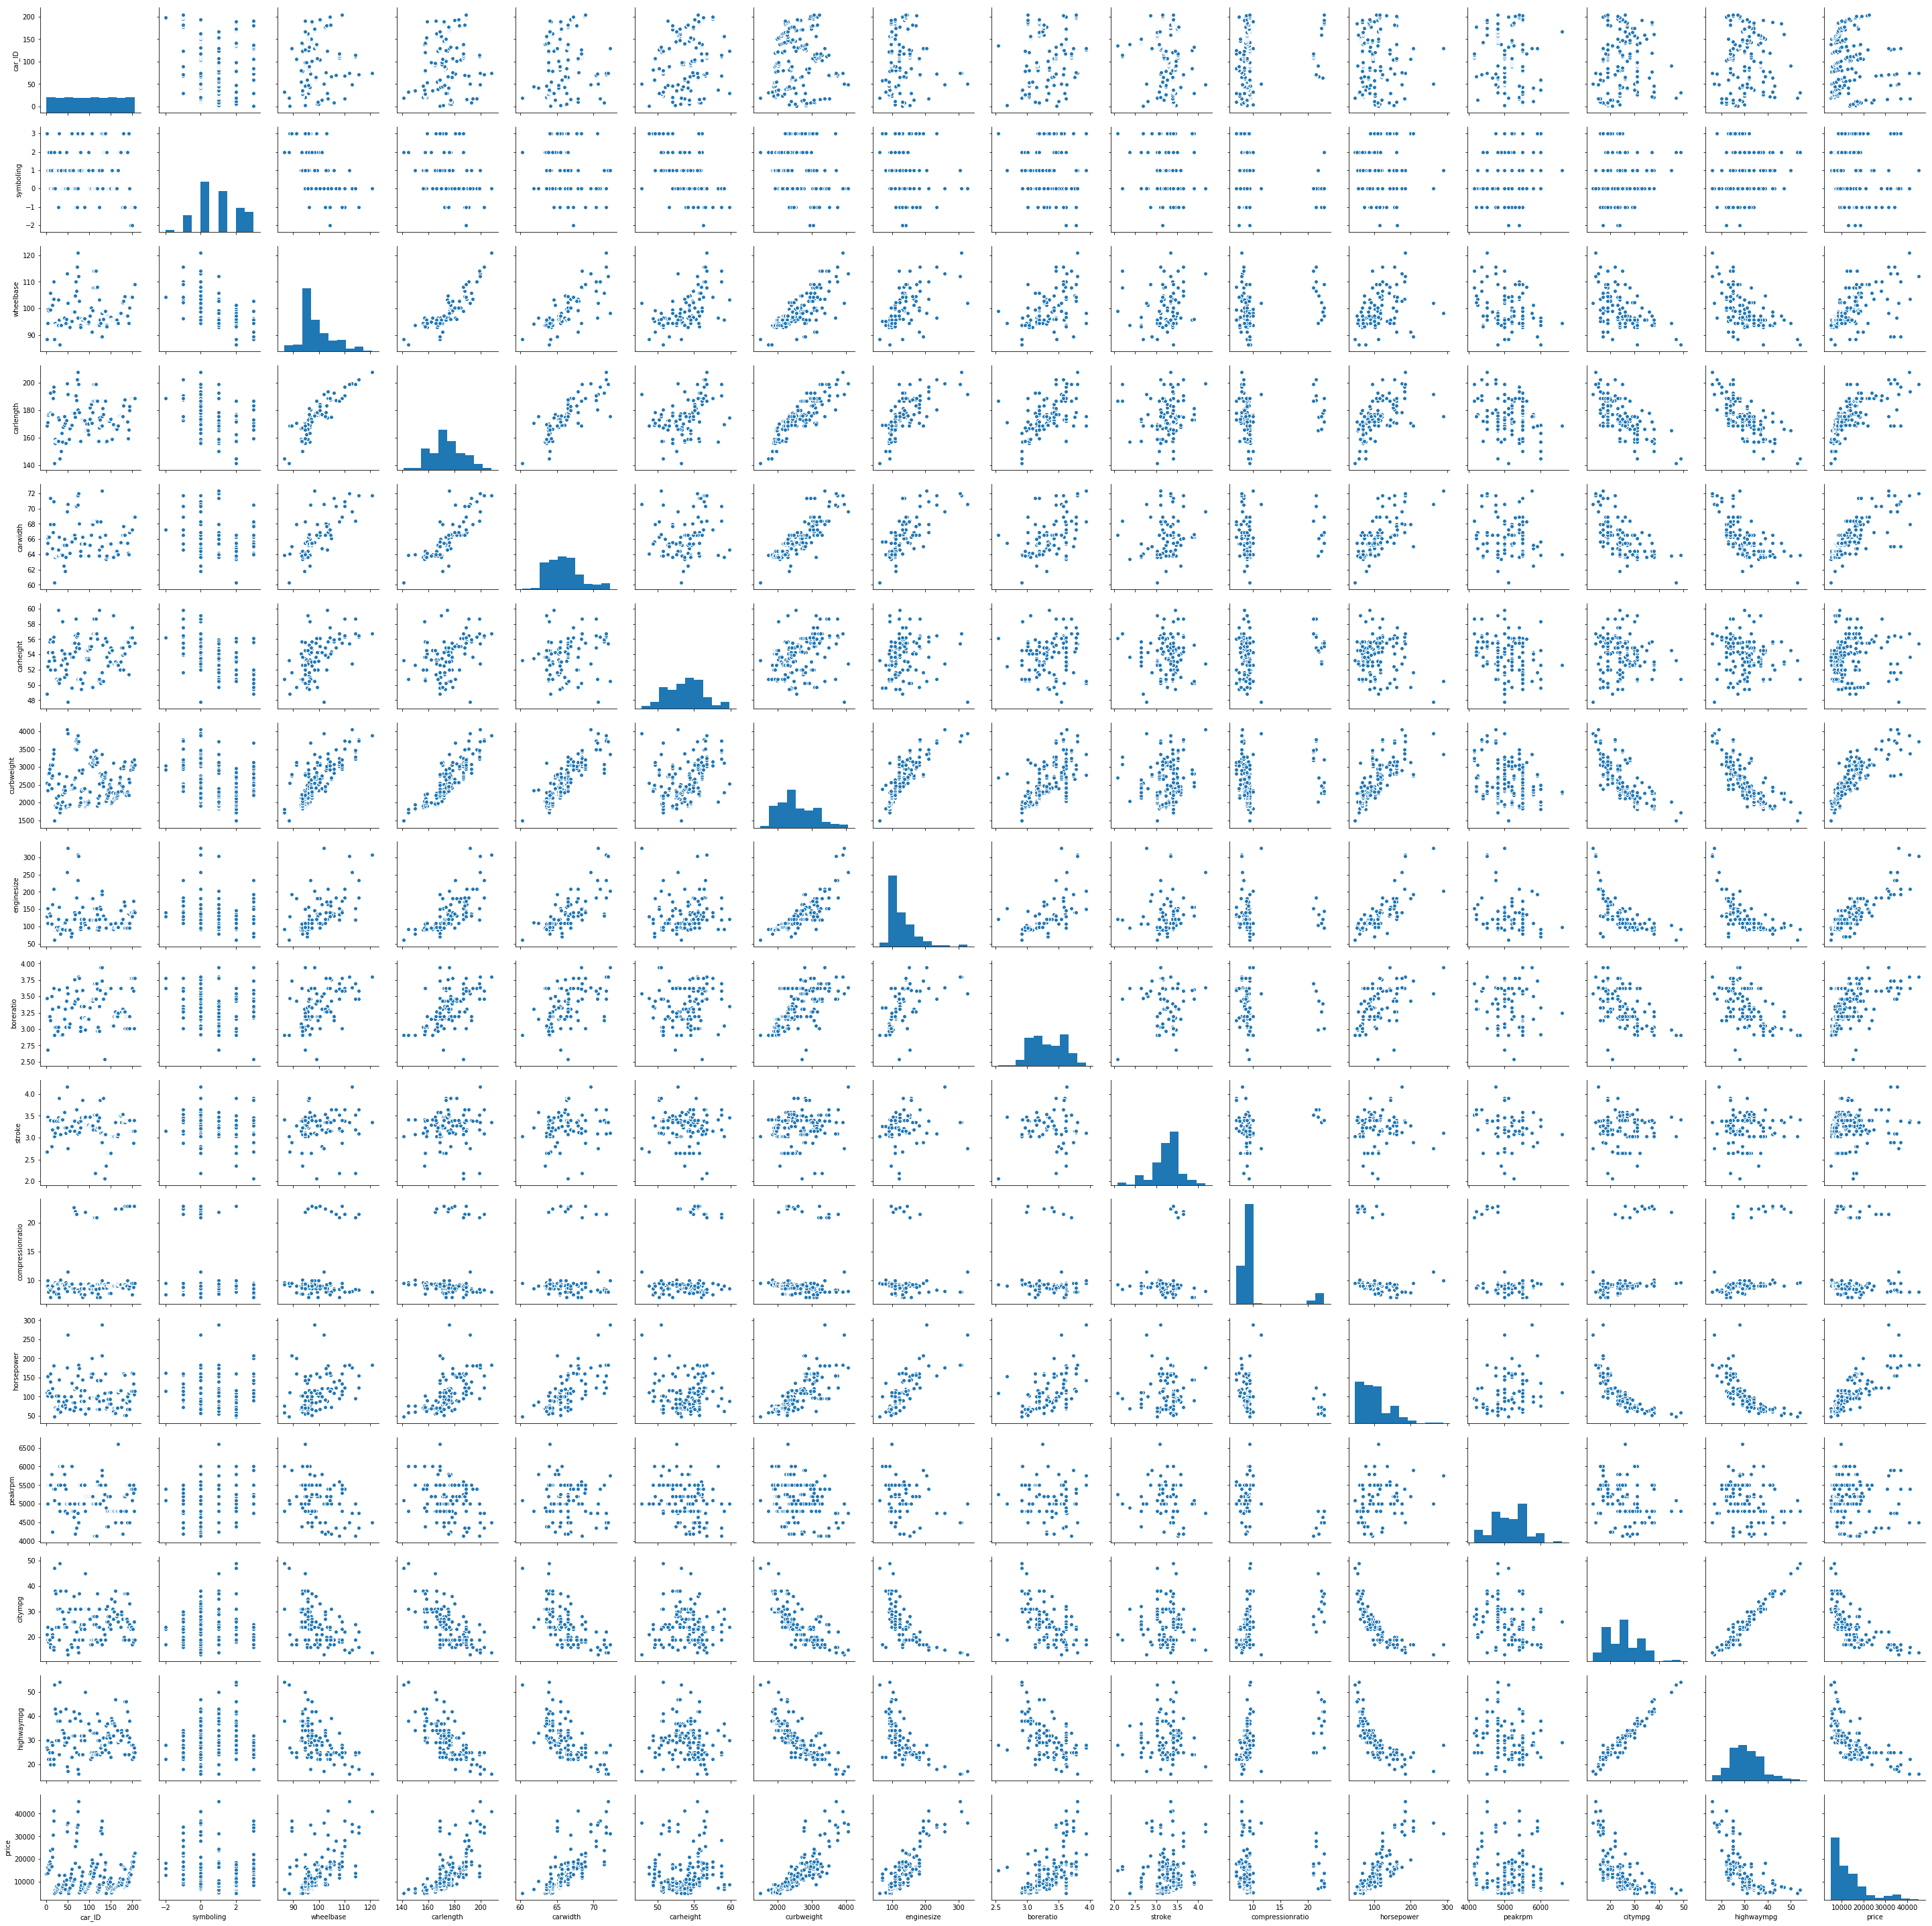

In [175]:
sns.pairplot(car)
plt.show()

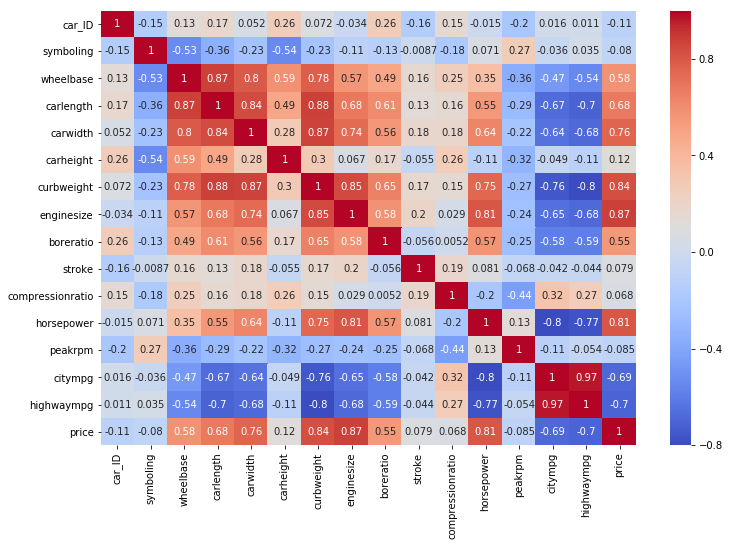

In [176]:
plt.figure(figsize=(12,8))
sns.heatmap(car.corr(), annot=True,cmap='coolwarm')

In [177]:
car.corr() 

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


### Data Preparation 

In [178]:
def fuel(x):
    if x == 'gas':
        return(1)
    elif x == 'diesel':
        return(2)
    else:
        return(0)
car['fueltype'] = car['fueltype'].apply(fuel)

In [179]:
def asp(x):
    if x == 'std' :
        return(1)
    elif x == 'turbo':
        return(2)
    else:
        return(0)
    
car['aspiration'] = car['aspiration'].apply(asp)

In [180]:
def door(x):
    if x == 'two' :
        return(2)
    elif x == 'four':
        return(4)
    else:
        return(0)
    
car['doornumber']= car['doornumber'].apply(door)

In [181]:
def location(x):
    if x == 'front' :
        return(1)
    elif x == 'rear':
        return(2)
    else:
        return(0)
    
car['enginelocation'] = car['enginelocation'].apply(location)

In [182]:
def cylinder(x):
    if x == 'four':
        return(4)
    elif x == 'six':
        return(6)
    elif x == 'five':
        return(5)
    elif x == 'three':
        return(3)
    elif x == 'twelve':
        return(12)
    elif x == 'two':
        return(2)
    elif x == 'eight':
        return(8)
    else:
        return(0)
car['cylindernumber'] = car['cylindernumber'].apply(cylinder)

In [183]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null int64
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm           

#### Creating Dummies

In [184]:
carbody_dummies = pd.get_dummies(car['carbody'])
carbody_dummies.head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [185]:
carname_dummies = pd.get_dummies(car['CarName'])
carname_dummies.head()

,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
drivewheel_dummies = pd.get_dummies(car['drivewheel'])
drivewheel_dummies.head()

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


In [187]:
enginetype_dummies = pd.get_dummies(car['enginetype'])
enginetype_dummies.head()

,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [188]:
fuelsystem_dummies = pd.get_dummies(car['fuelsystem'])
fuelsystem_dummies.head()

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [189]:
#Concatinating the dummies df created
car = pd.concat([car,carbody_dummies,carname_dummies,drivewheel_dummies,enginetype_dummies,fuelsystem_dummies],axis = 1)

In [190]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 71 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null int64
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm           

In [191]:
#dropping unecessary columns according to the correlation and dummies
car.drop(['carbody','CarName','drivewheel','enginetype','fuelsystem','car_ID','compressionratio','symboling','peakrpm','stroke'],axis = 1 , inplace =True)
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 61 columns):
fueltype          205 non-null int64
aspiration        205 non-null int64
doornumber        205 non-null int64
enginelocation    205 non-null int64
wheelbase         205 non-null float64
carlength         205 non-null float64
carwidth          205 non-null float64
carheight         205 non-null float64
curbweight        205 non-null int64
cylindernumber    205 non-null int64
enginesize        205 non-null int64
boreratio         205 non-null float64
horsepower        205 non-null int64
citympg           205 non-null int64
highwaympg        205 non-null int64
price             205 non-null float64
convertible       205 non-null uint8
hardtop           205 non-null uint8
hatchback         205 non-null uint8
sedan             205 non-null uint8
wagon             205 non-null uint8
alfa-romero       205 non-null uint8
audi              205 non-null uint8
bmw               205 non-null u

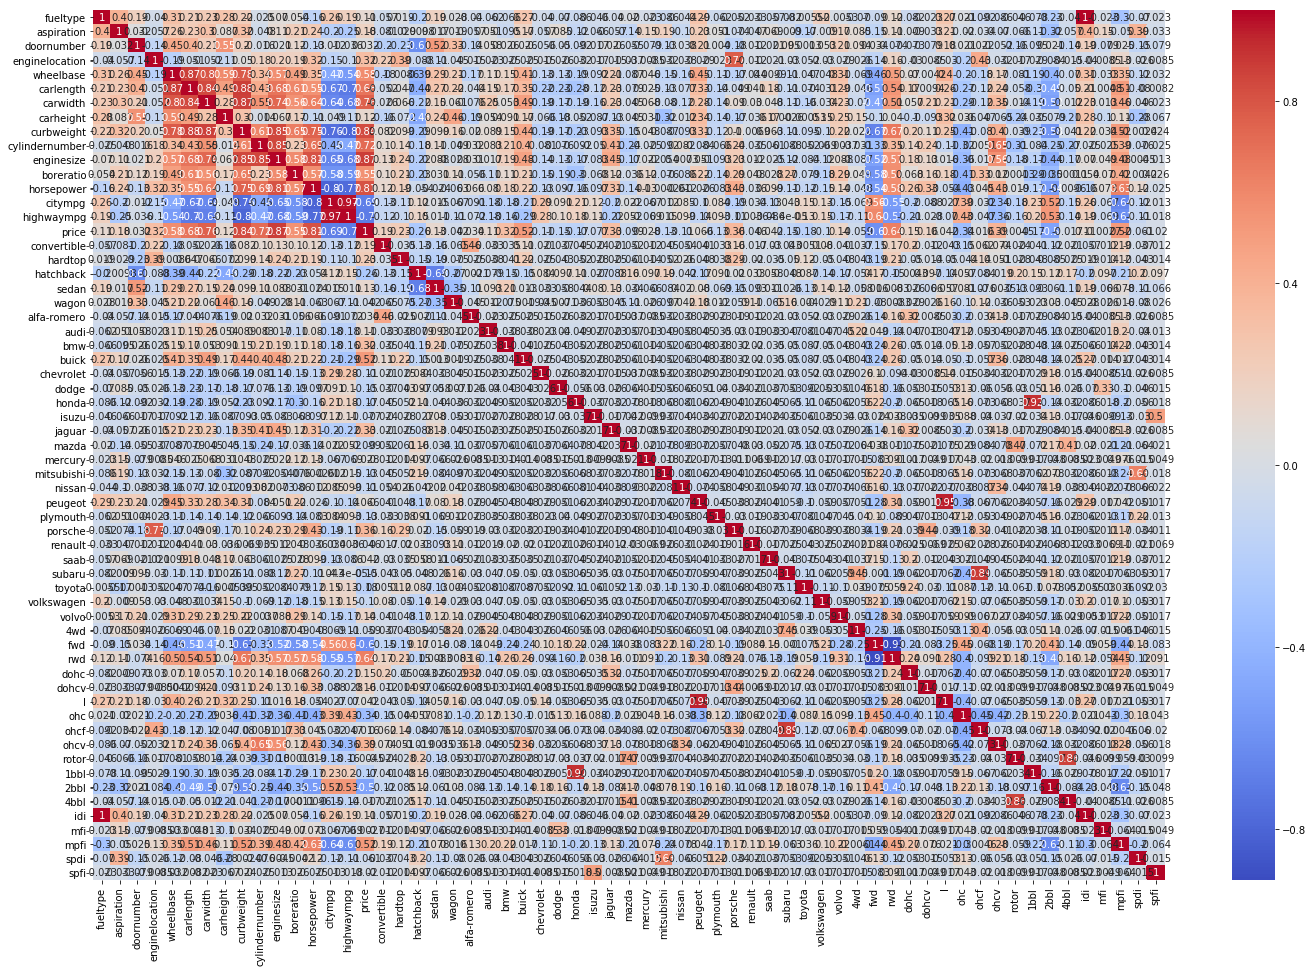

In [192]:
plt.figure(figsize=(24,16))
sns.heatmap(car.corr(), annot=True,cmap='coolwarm')

In [193]:
cor_data = pd.DataFrame(car.corr())

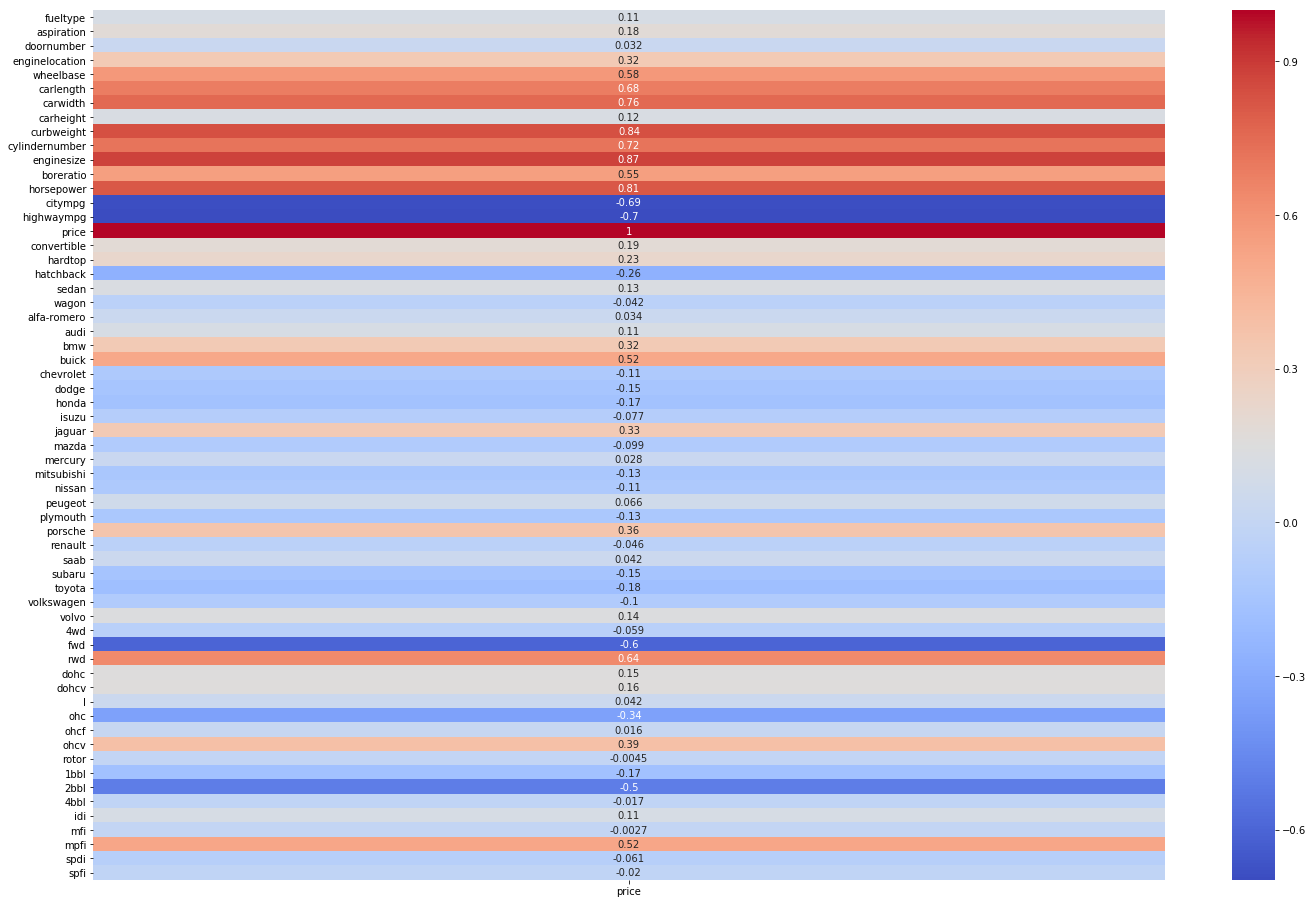

In [194]:
#analysis data with price
plt.figure(figsize=(24,16))
pd.DataFrame(cor_data.loc['price'])
sns.heatmap(pd.DataFrame(cor_data.loc['price']), annot=True,cmap='coolwarm')

In [195]:
cor_price = pd.DataFrame(cor_data.loc['price'])

In [196]:
cor_price['price'] = cor_price['price'].apply(abs)

In [197]:
cor_price.sort_values(by='price')

,price
mfi,0.002747
rotor,0.004544
ohcf,0.016285
4bbl,0.017306
spfi,0.019580
mercury,0.028344
doornumber,0.031835
alfa-romero,0.033973
l,0.042267
wagon,0.042310


In [198]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 61 columns):
fueltype          205 non-null int64
aspiration        205 non-null int64
doornumber        205 non-null int64
enginelocation    205 non-null int64
wheelbase         205 non-null float64
carlength         205 non-null float64
carwidth          205 non-null float64
carheight         205 non-null float64
curbweight        205 non-null int64
cylindernumber    205 non-null int64
enginesize        205 non-null int64
boreratio         205 non-null float64
horsepower        205 non-null int64
citympg           205 non-null int64
highwaympg        205 non-null int64
price             205 non-null float64
convertible       205 non-null uint8
hardtop           205 non-null uint8
hatchback         205 non-null uint8
sedan             205 non-null uint8
wagon             205 non-null uint8
alfa-romero       205 non-null uint8
audi              205 non-null uint8
bmw               205 non-null u

In [199]:
#training and testing data intialisation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(car.drop('price', axis = 1), car['price'], test_size = 0.3)

In [200]:
len(X_train.index)

143

In [201]:
len(X_test.index)

62

In [202]:
#Scaling the variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [203]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [204]:
scaled_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

In [205]:
scaled_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0.0,0.0,0.0,0.0,0.207430,0.327022,0.371429,0.150000,0.243607,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.269350,0.373494,0.352381,0.658333,0.216240,0.2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.083591,0.356282,0.580952,0.158333,0.584118,0.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.226006,0.399312,0.428571,0.200000,0.446837,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.427245,0.440620,0.447619,0.591667,0.258860,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [206]:
scaled_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [207]:
scaled_test.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0.0,0.0,0.0,0.0,0.157895,0.000000,0.209524,0.400000,0.053387,0.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.027864,0.325301,0.304762,0.316667,0.412293,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.325077,0.629948,0.447619,0.691667,0.435621,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.244582,0.328744,0.400000,0.266667,0.204576,0.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.232198,0.461274,0.457143,0.225000,0.279498,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Data prediction without using RFE

In [208]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(scaled_train, y_train)
reg.score(scaled_train, y_train)


0.971022791633813

In [209]:
pred = reg.predict(scaled_test)

In [210]:
#predicted values
pred

array([ 6388.29821469, 32778.04924652, 17532.82973079, 15256.64976965,
       14371.00786229,  7543.90676359,  6360.84163725, 13315.73410634,
        7770.85156375, 19935.80817394, 18873.01424683, 10601.15597994,
        6881.01348459,  7092.72467964,  6682.87046691, 11885.38306417,
        1324.39160227, 10082.17083563,  5522.60845501,  9524.43602127,
        9361.4601813 , 16471.70094366, 12004.98536377,  3905.00221728,
       18489.7054587 ,  4999.20359103,  7526.63598484, 32639.74805019,
       11700.77921625,  5800.4062058 , 10298.90746175, 11885.38306417,
       15842.14376916, 12810.87668659, 30089.65195776, 23897.3306271 ,
       13135.34234154,  9410.86447897,  9625.87365424, 17076.77054746,
        6443.14490351,  6368.53649562, 26605.8561057 ,  6422.8818607 ,
        6468.44695912,  9973.84272474,  5051.56195449,  6711.02597085,
        8908.35620719, 14318.41714906,  5302.72812729, 13272.83296676,
        5903.43863373,  7133.48322521, 15210.69034243, 14570.2162085 ,
      

In [211]:
# r2_score test
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.740240565937724

In [212]:
#co-efficient values
reg.coef_

array([-8.06958998e+02,  1.67697981e+03, -1.12456659e+03,  4.71007443e+03,
       -3.69565514e+03,  4.22575716e+03,  1.38226894e+04, -1.52974277e+03,
        2.75305449e+03, -2.27341724e+04,  3.56786477e+04, -1.34838497e+04,
        6.21036558e+03,  7.55733515e+02, -2.33726224e+02,  3.52880851e+03,
       -4.16748269e+02, -1.82434001e+03, -6.85793547e+02, -6.01926680e+02,
       -1.55577941e+03, -3.28991366e+03,  1.10772348e+04,  6.09437157e+03,
       -2.37051687e+03, -3.45265143e+03, -1.15718953e+03,  1.51370863e+01,
        1.48404521e+03, -2.88697024e+03,  1.03053366e+03, -4.62277307e+03,
       -2.94092106e+03, -3.06857811e+02, -3.07902073e+03,  8.19882934e+03,
        5.45696821e-12,  8.85271822e+02, -2.92896599e+03, -2.14037072e+03,
       -1.60533215e+03,  3.55183916e+03,  1.31330438e+03,  1.77515477e+02,
       -1.49081986e+03, -3.49098017e+02, -1.36850526e+02, -3.06857811e+02,
       -1.60206880e+03,  1.78110844e+03, -1.70523701e+03,  2.31900372e+03,
       -1.15718953e+03,  

In [213]:
reg.intercept_

13136.56161816373

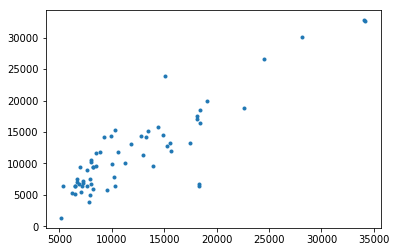

In [214]:
#plotting the prediction
plt.plot(y_test, pred, '.')

## Model Building using RFE

In [215]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [216]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

car_train, car_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

In [217]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [219]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
numeric_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']

car_train[numeric_vars] = scaler.fit_transform(car_train[numeric_vars])
car_train.head()
y_train = car_train.pop('price')
X_train = car_train

In [220]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [221]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 31),
 ('aspiration', False, 14),
 ('doornumber', False, 35),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', False, 17),
 ('carwidth', True, 1),
 ('carheight', False, 4),
 ('curbweight', True, 1),
 ('cylindernumber', False, 9),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('horsepower', True, 1),
 ('citympg', True, 1),
 ('highwaympg', False, 22),
 ('convertible', True, 1),
 ('hardtop', False, 21),
 ('hatchback', False, 18),
 ('sedan', False, 24),
 ('wagon', False, 38),
 ('alfa-romero', False, 33),
 ('audi', False, 3),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 12),
 ('dodge', False, 10),
 ('honda', False, 13),
 ('isuzu', False, 29),
 ('jaguar', True, 1),
 ('mazda', False, 30),
 ('mercury', False, 39),
 ('mitsubishi', False, 8),
 ('nissan', False, 25),
 ('peugeot', True, 1),
 ('plymouth', False, 11),
 ('porsche', True, 1),
 ('renault', False, 20),
 ('saab', False, 2),
 ('subaru', True, 1),
 ('toyota', False, 26),
 ('vo

In [222]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'convertible', 'bmw', 'buick',
       'jaguar', 'peugeot', 'porsche', 'subaru', 'volvo', 'dohcv', 'l', 'ohcf',
       'rotor'],
      dtype='object')

In [223]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'carlength', 'carheight',
       'cylindernumber', 'highwaympg', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'alfa-romero', 'audi', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'mazda', 'mercury', 'mitsubishi', 'nissan', 'plymouth', 'renault',
       'saab', 'toyota', 'volkswagen', '4wd', 'fwd', 'rwd', 'dohc', 'ohc',
       'ohcv', '1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [247]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [248]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)


In [249]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [250]:
#summary of linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     117.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.85e-69
Time:                        23:18:24   Log-Likelihood:                 227.76
No. Observations:                 143   AIC:                            -415.5
Df Residuals:                     123   BIC:                            -356.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3331      0.053     -6.

In [251]:
X_train_new = X_train_rfe.drop(["enginesize"], axis = 1)

In [252]:
lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     124.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.52e-70
Time:                        23:18:35   Log-Likelihood:                 227.76
No. Observations:                 143   AIC:                            -417.5
Df Residuals:                     124   BIC:                            -361.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3339      0.051     -6.

In [253]:
X_train_new1 = X_train_new.drop(["wheelbase"], axis = 1)

In [254]:
lm = sm.OLS(y_train,X_train_new1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     131.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.93e-71
Time:                        23:18:59   Log-Likelihood:                 227.06
No. Observations:                 143   AIC:                            -418.1
Df Residuals:                     125   BIC:                            -364.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3299      0.051     -6.

In [232]:
X_train_new2 = X_train_new1.drop(["boreratio"], axis = 1)

In [233]:
lm = sm.OLS(y_train,X_train_new2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     136.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.80e-71
Time:                        23:07:05   Log-Likelihood:                 225.11
No. Observations:                 143   AIC:                            -416.2
Df Residuals:                     126   BIC:                            -365.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3549      0.049     -7.

In [255]:
X_train_new3 = X_train_new2.drop(["dohcv"], axis = 1)

In [256]:
lm = sm.OLS(y_train,X_train_new3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     145.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.57e-72
Time:                        23:19:17   Log-Likelihood:                 224.09
No. Observations:                 143   AIC:                            -416.2
Df Residuals:                     127   BIC:                            -368.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3717      0.048     -7.

In [257]:
X_train_new4 = X_train_new3.drop(["l"], axis = 1)
lm = sm.OLS(y_train,X_train_new4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     151.7
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.82e-72
Time:                        23:19:30   Log-Likelihood:                 221.99
No. Observations:                 143   AIC:                            -414.0
Df Residuals:                     128   BIC:                            -369.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3735      0.048     -7.

In [258]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginelocation,inf
12,subaru,inf
14,ohcf,inf
3,curbweight,10.400000
2,carwidth,5.490000
4,horsepower,5.480000
5,citympg,4.080000
11,porsche,2.090000
8,buick,2.050000
10,peugeot,1.850000


In [259]:
X_train_new5 = X_train_new4.drop(["ohcf"], axis = 1)

In [260]:
lm = sm.OLS(y_train,X_train_new5).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     151.7
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.82e-72
Time:                        23:19:59   Log-Likelihood:                 221.99
No. Observations:                 143   AIC:                            -414.0
Df Residuals:                     128   BIC:                            -369.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6254      0.085     -7.

In [261]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,351.72
3,curbweight,10.40
2,carwidth,5.49
4,horsepower,5.48
5,citympg,4.08
11,porsche,2.09
8,buick,2.05
10,peugeot,1.85
1,enginelocation,1.66
9,jaguar,1.63


In [262]:
X_train_new6 = X_train_new5.drop(["subaru"], axis = 1)

In [263]:
lm = sm.OLS(y_train,X_train_new6).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     162.2
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.51e-73
Time:                        23:20:15   Log-Likelihood:                 220.96
No. Observations:                 143   AIC:                            -413.9
Df Residuals:                     129   BIC:                            -372.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6339      0.085     -7.

In [264]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,349.84
3,curbweight,10.39
2,carwidth,5.49
4,horsepower,5.43
5,citympg,4.02
11,porsche,2.09
8,buick,2.05
10,peugeot,1.84
1,enginelocation,1.66
9,jaguar,1.63


In [265]:
X_train_new7 = X_train_new6.drop(["peugeot"], axis = 1)

In [266]:
lm = sm.OLS(y_train,X_train_new7).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     172.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.32e-73
Time:                        23:20:43   Log-Likelihood:                 219.15
No. Observations:                 143   AIC:                            -412.3
Df Residuals:                     130   BIC:                            -373.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6005      0.084     -7.

In [267]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,333.42
3,curbweight,7.84
2,carwidth,5.41
4,horsepower,4.64
5,citympg,3.92
10,porsche,2.09
1,enginelocation,1.64
8,buick,1.60
9,jaguar,1.48
12,rotor,1.21


In [268]:
X_train_datanew8 = X_train_new7.drop(["const"], axis = 1)

In [269]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_datanew8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,41.42
2,curbweight,37.29
1,carwidth,34.22
4,citympg,13.97
3,horsepower,13.14
7,buick,1.55
8,jaguar,1.49
9,porsche,1.47
11,rotor,1.20
6,bmw,1.18


In [271]:
X_train_datanew9 = X_train_datanew8.drop(["curbweight"], axis = 1)

In [272]:
lm = sm.OLS(y_train,X_train_datanew9).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     253.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.81e-83
Time:                        23:23:45   Log-Likelihood:                 187.38
No. Observations:                 143   AIC:                            -352.8
Df Residuals:                     132   BIC:                            -320.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
enginelocation    -0.0228      0.034     -0.

In [275]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_datanew9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,37.14
1,carwidth,17.57
2,horsepower,12.51
3,citympg,12.23
6,buick,1.46
8,porsche,1.37
7,jaguar,1.34
5,bmw,1.16
9,volvo,1.15
10,rotor,1.15


In [276]:
X_train_datanew10 = X_train_datanew9.drop(["carwidth"], axis = 1)

In [277]:
lm = sm.OLS(y_train,X_train_datanew10).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     199.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           7.25e-75
Time:                        23:26:35   Log-Likelihood:                 164.00
No. Observations:                 143   AIC:                            -308.0
Df Residuals:                     133   BIC:                            -278.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
enginelocation     0.0962      0.035      2.

In [279]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_datanew10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,28.36
2,citympg,12.06
1,horsepower,10.27
6,jaguar,1.33
7,porsche,1.31
4,bmw,1.16
5,buick,1.15
9,rotor,1.15
8,volvo,1.11
3,convertible,1.10


In [282]:
X_train_datanew11 = X_train_datanew10.drop(["enginelocation"], axis = 1)

In [283]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_datanew11
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.61
1,citympg,1.46
6,porsche,1.30
5,jaguar,1.29
3,bmw,1.16
4,buick,1.15
7,volvo,1.10
2,convertible,1.08
8,rotor,1.05


## Residual Analysis of the train data

In [285]:
y_train_price = lm.predict(X_train_datanew10)


In [286]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,0,'Errors')

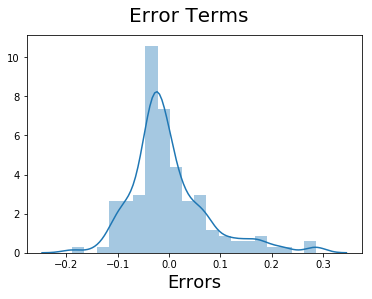

In [287]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)      
plt.xlabel('Errors', fontsize = 18)     

In [288]:
var = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']


In [289]:
car_test[var] = scaler.transform(car_test[var])
y_test = car_test.pop('price')
X_test = car_test

In [292]:
X_test= sm.add_constant(X_test)
X_test_new = X_test[X_train_datanew10.columns]

In [293]:
y_pred = lm.predict(X_test_new)

Text(0,0.5,'y_pred')

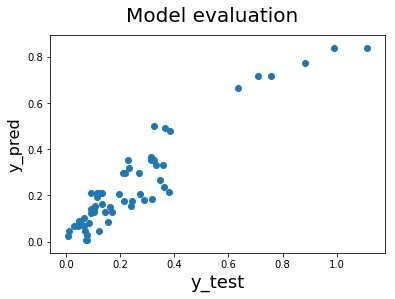

In [295]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('Model evaluation', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                   
plt.ylabel('y_pred', fontsize=16) 

In [296]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.880810505232833